## Exploratory Data Analysis

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
aa62_data = np.load('../data/AA66266AA.npy', allow_pickle=True)
aa64_data = np.load('../data/AA66466AA.npy', allow_pickle=True)
aa65_data = np.load('../data/AA66566AA.npy', allow_pickle=True)

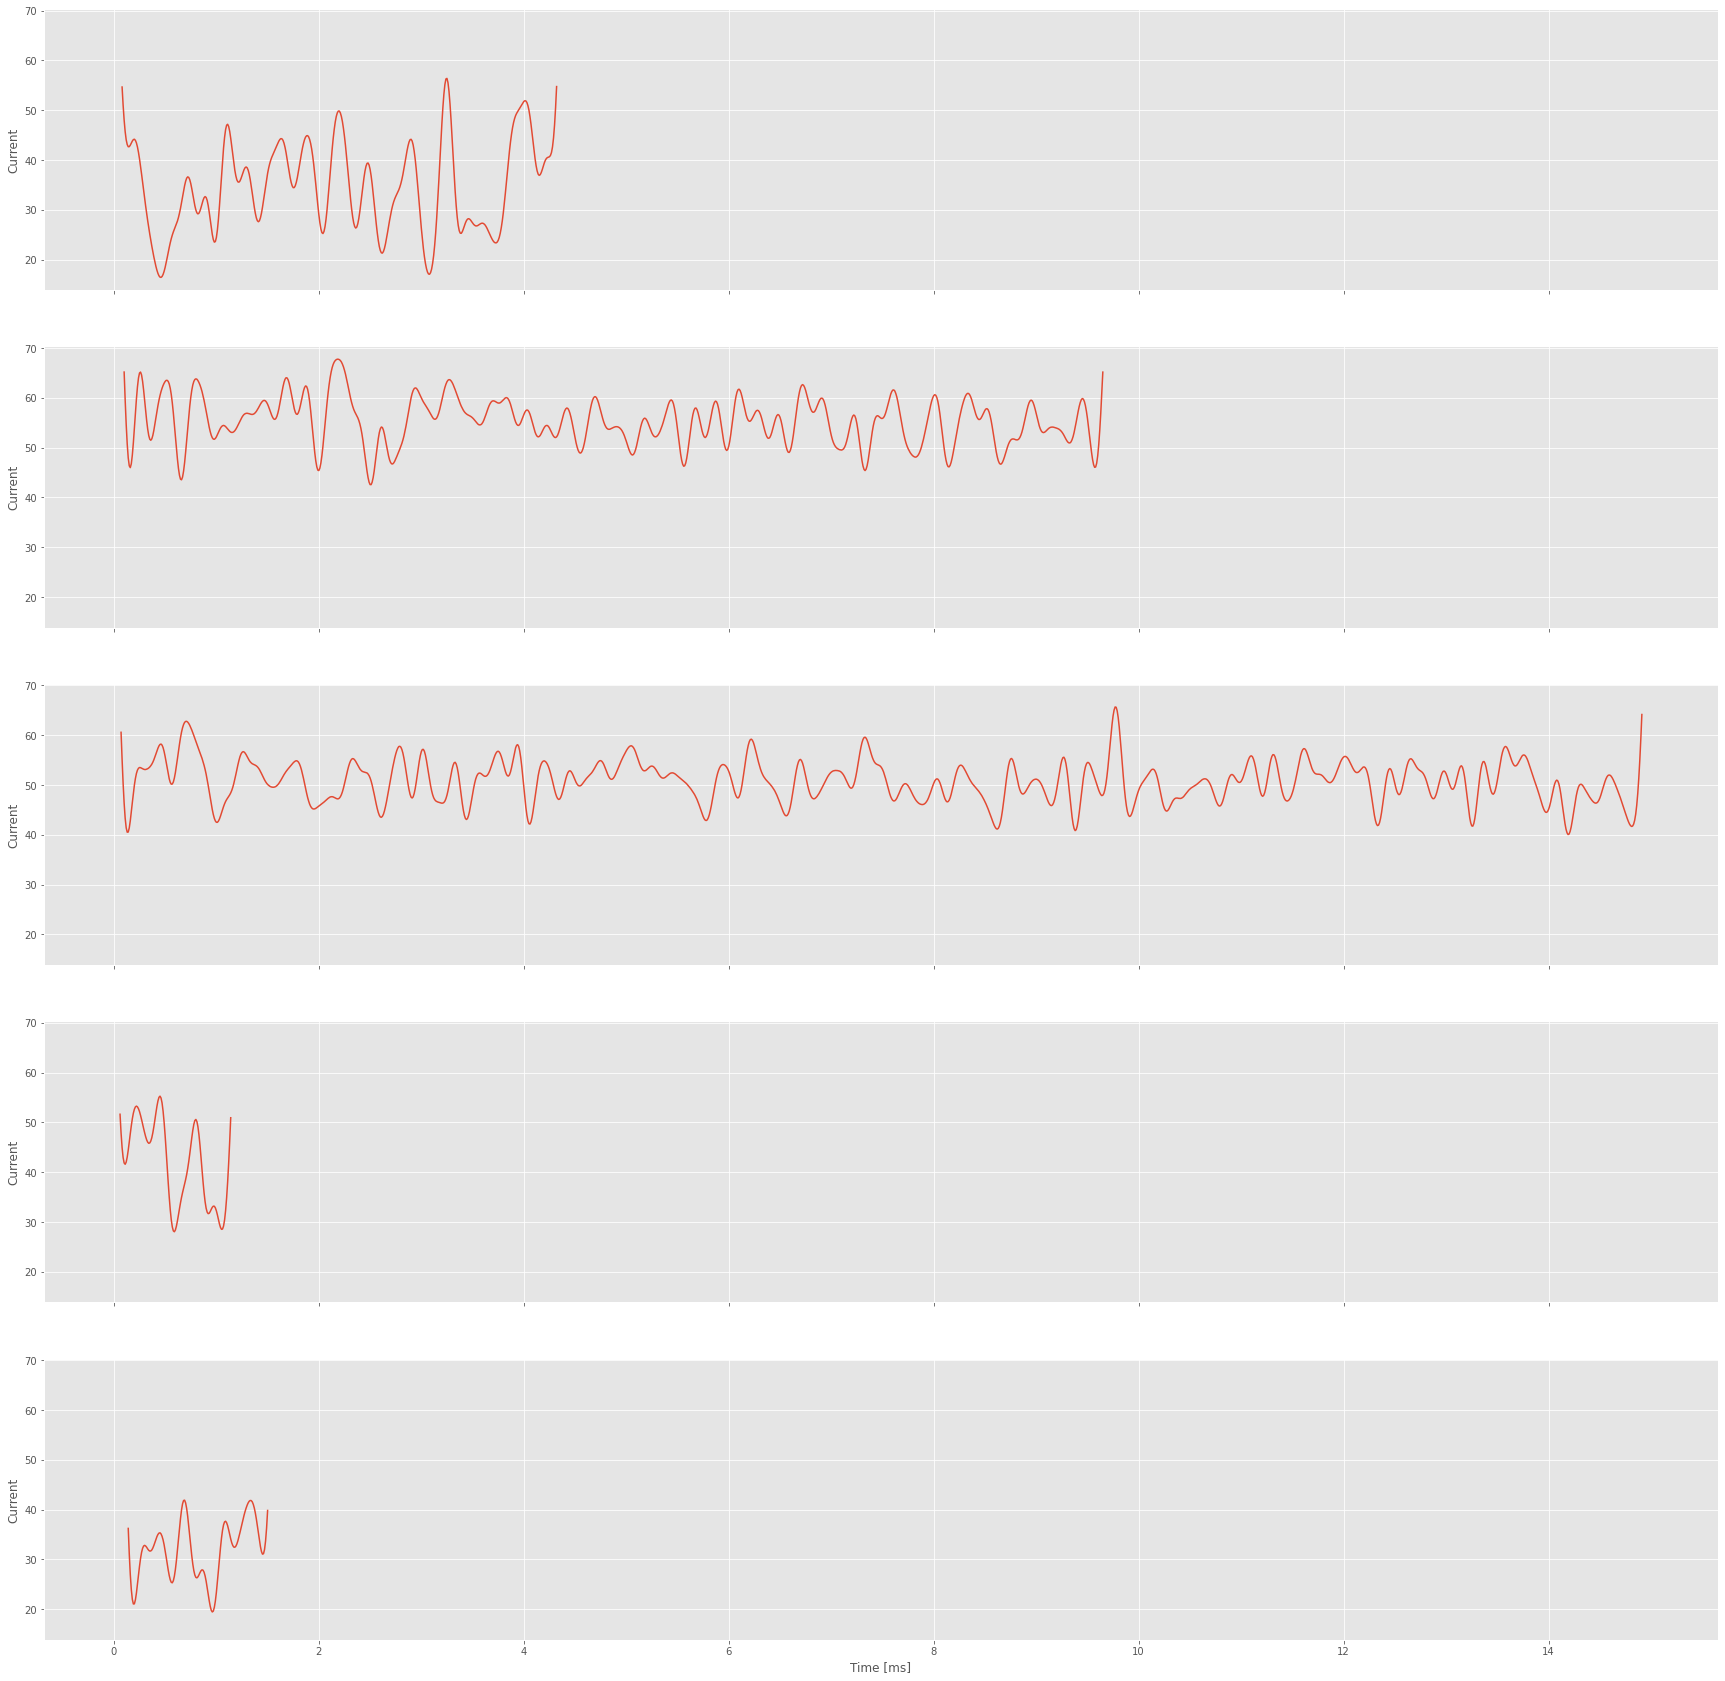

In [9]:
plot_data(aa62_data[:5])

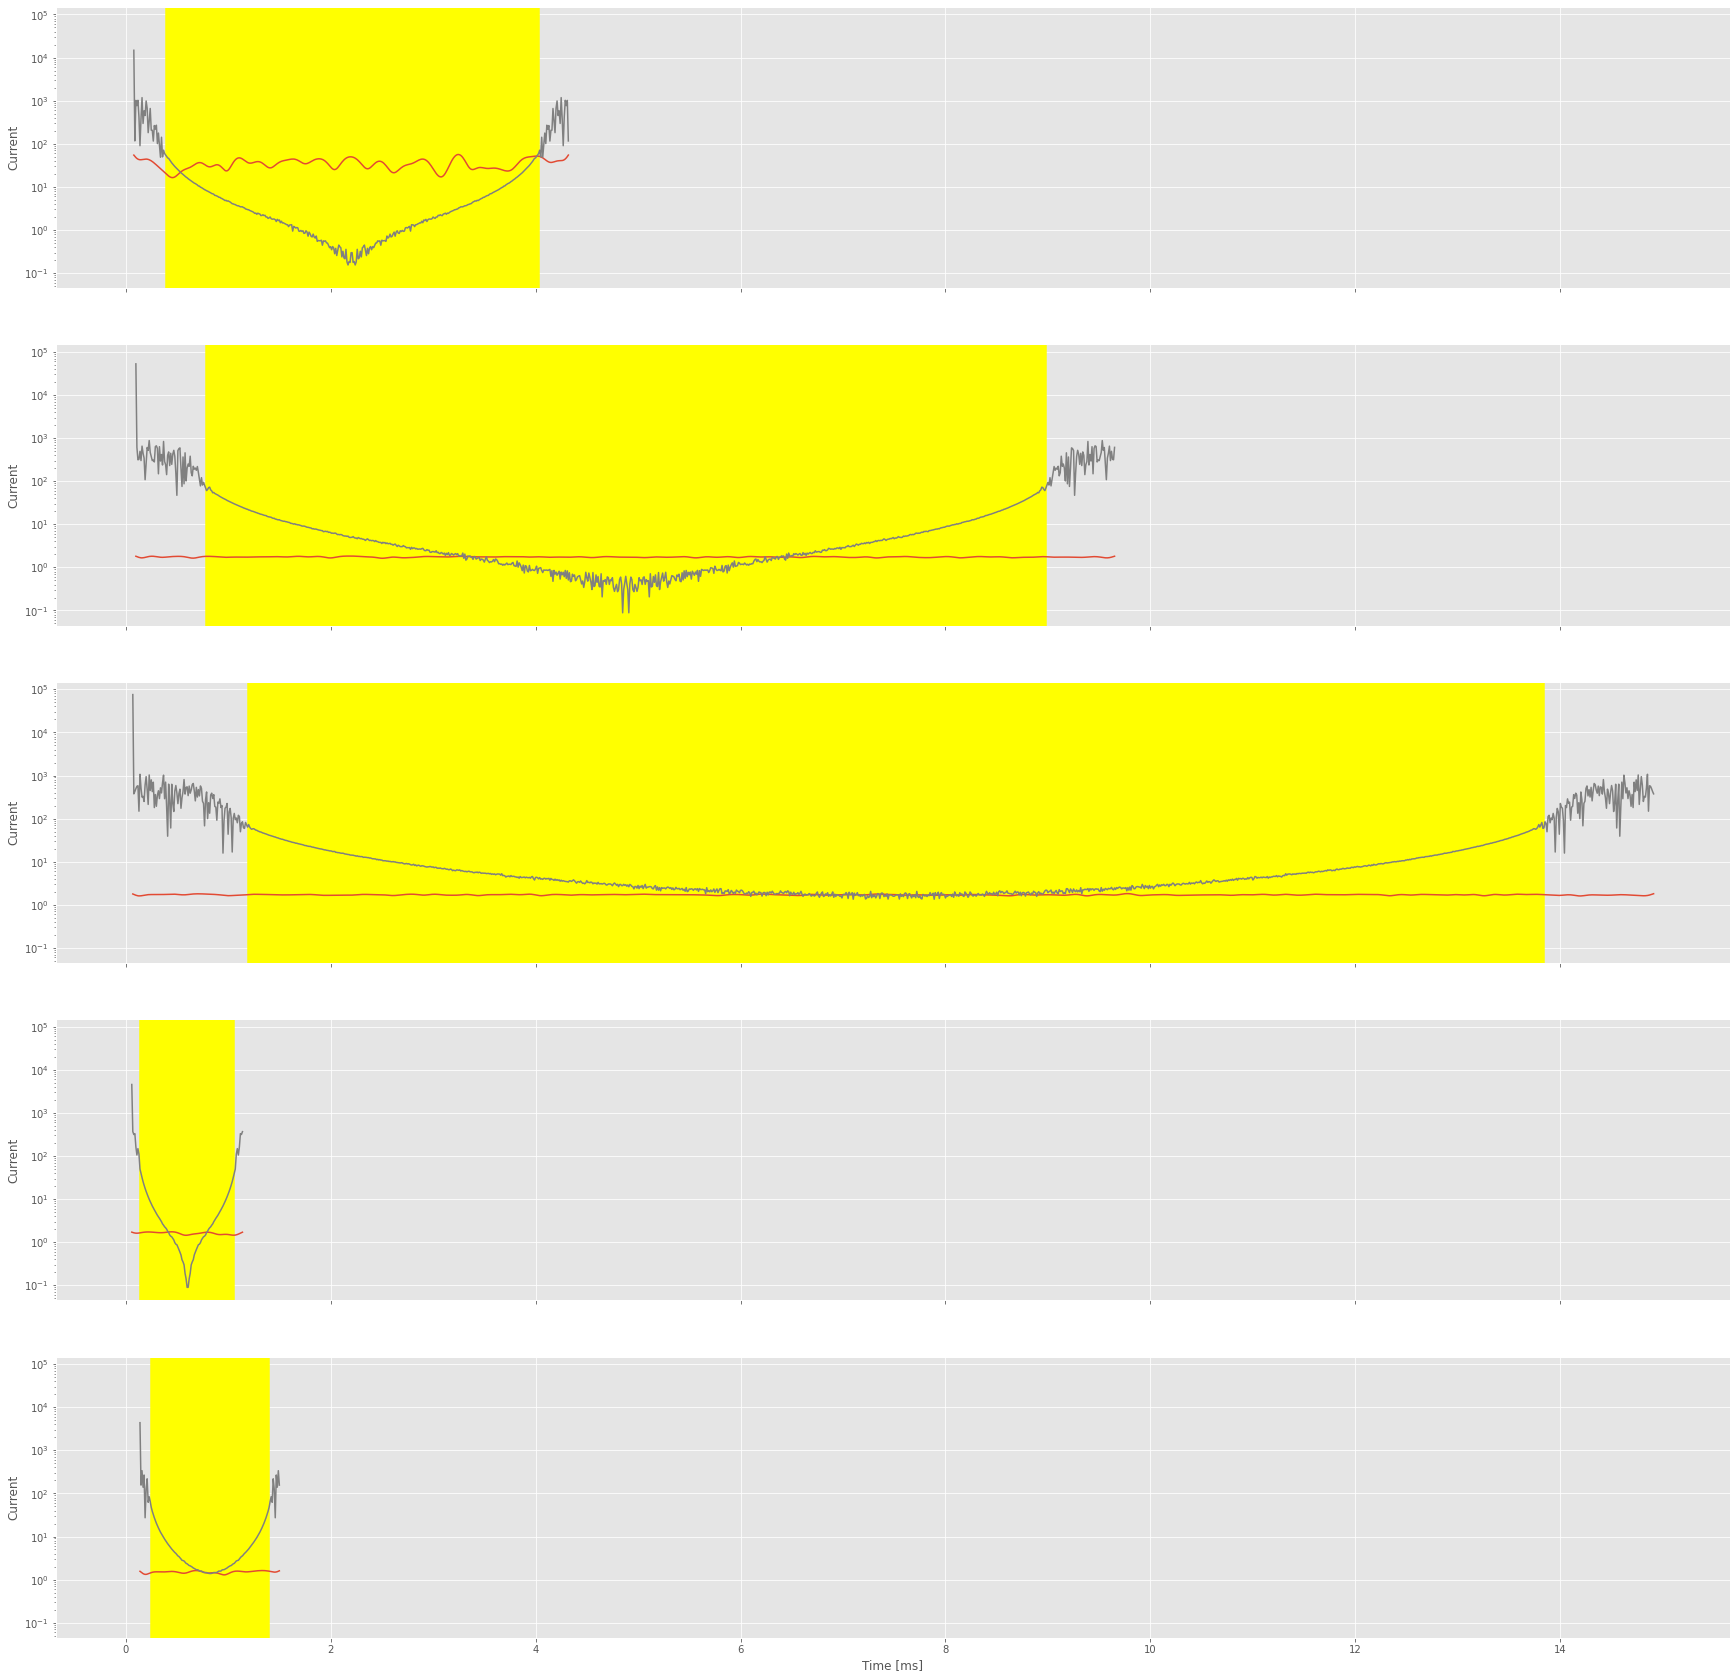

In [6]:
plot_data(aa62_data[:5], plot_fft=True)

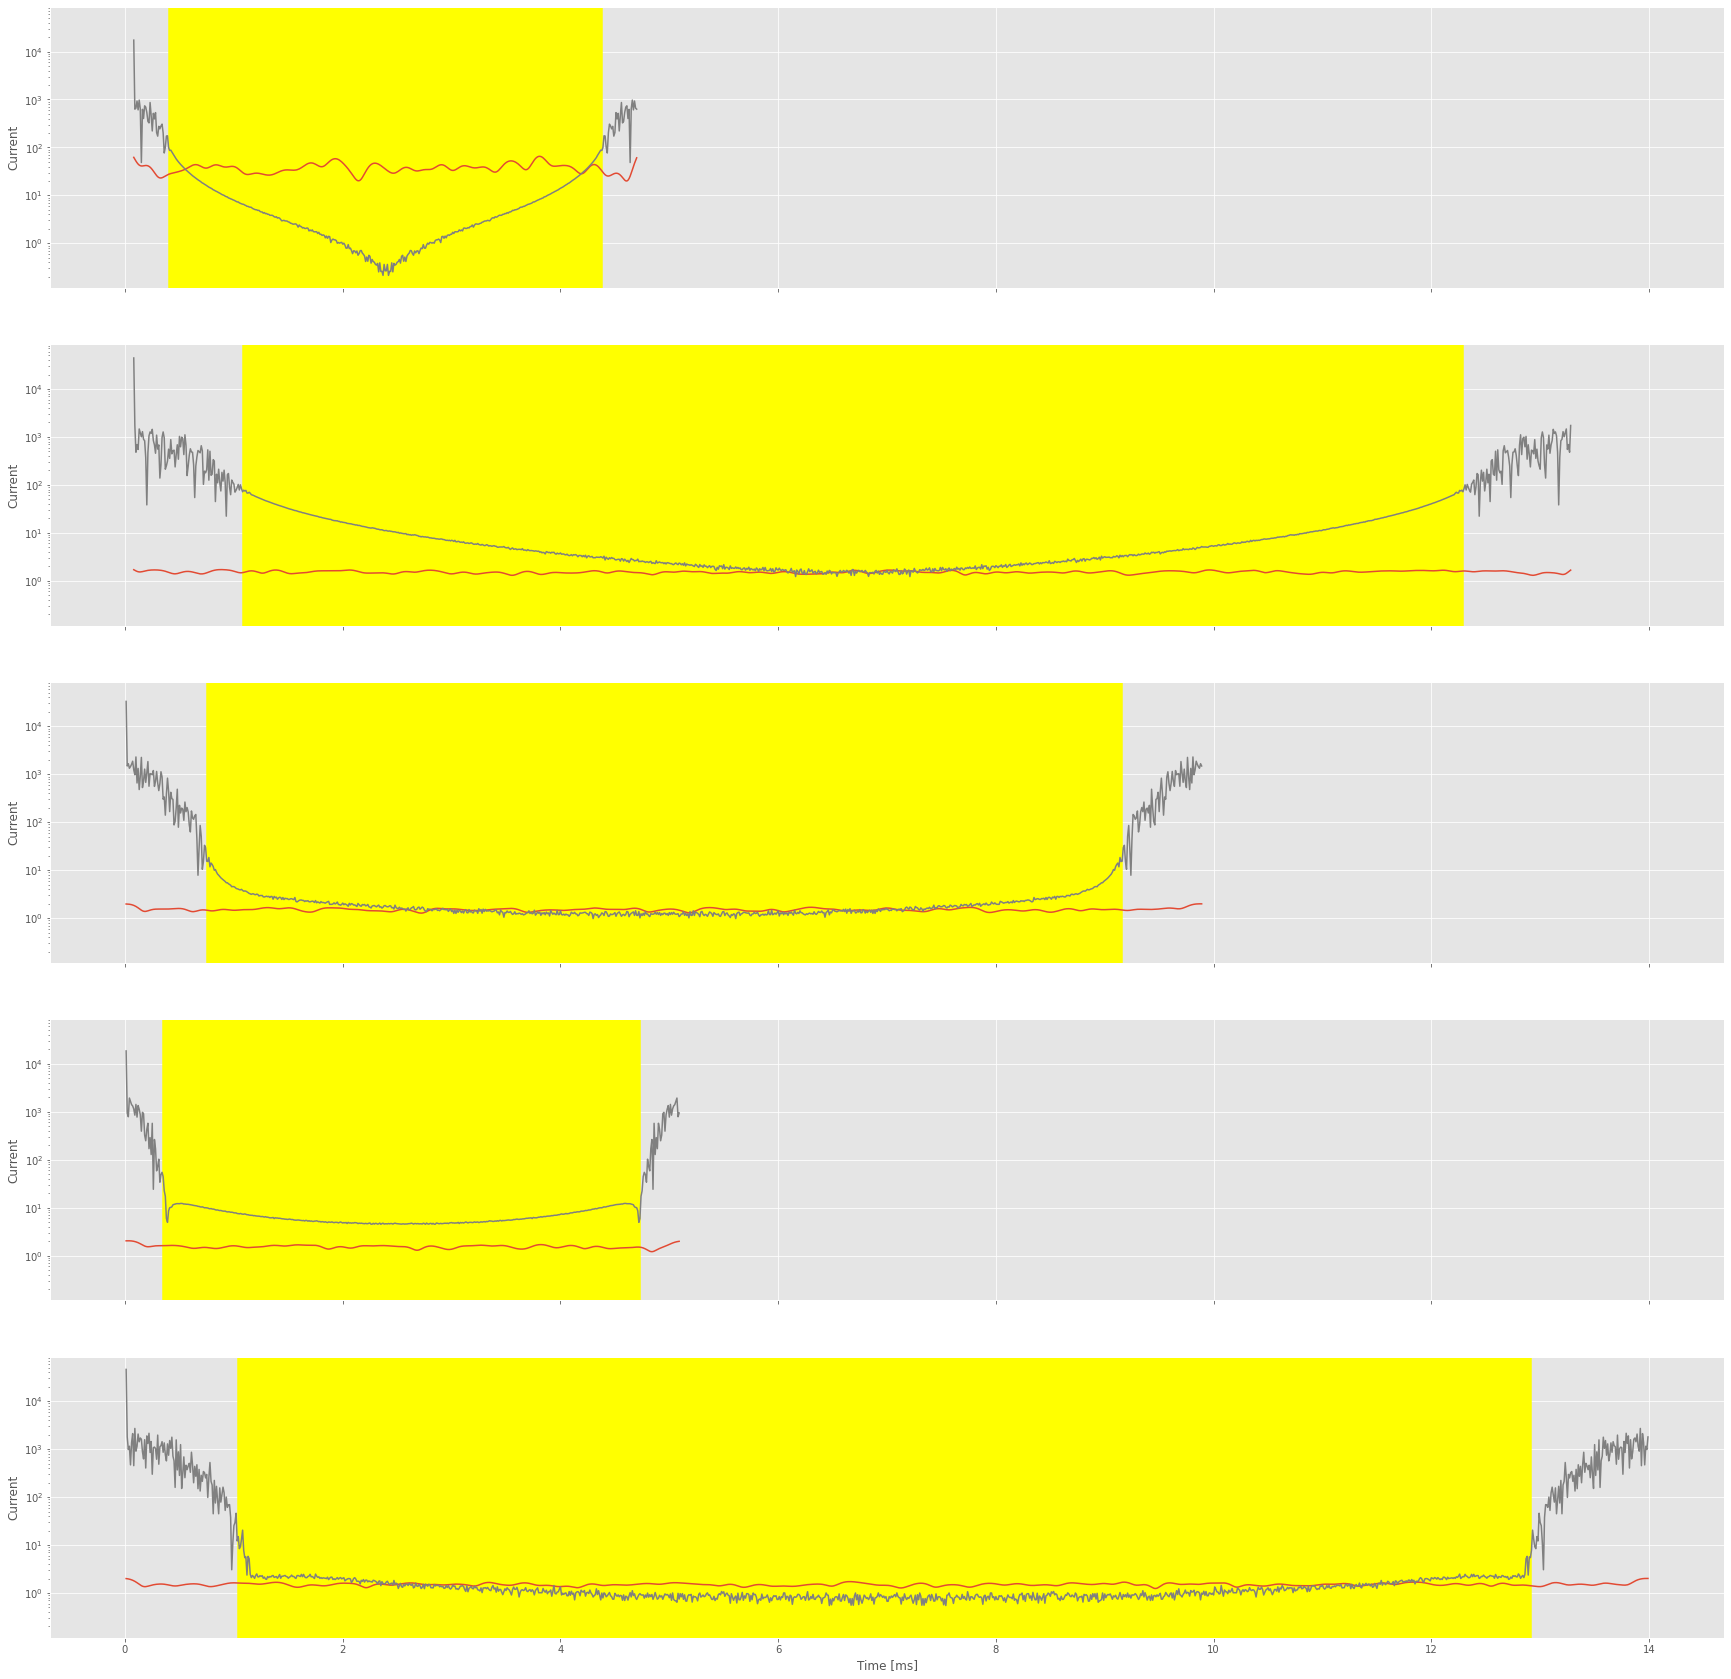

In [7]:
plot_data(aa64_data[:5], plot_fft=True)

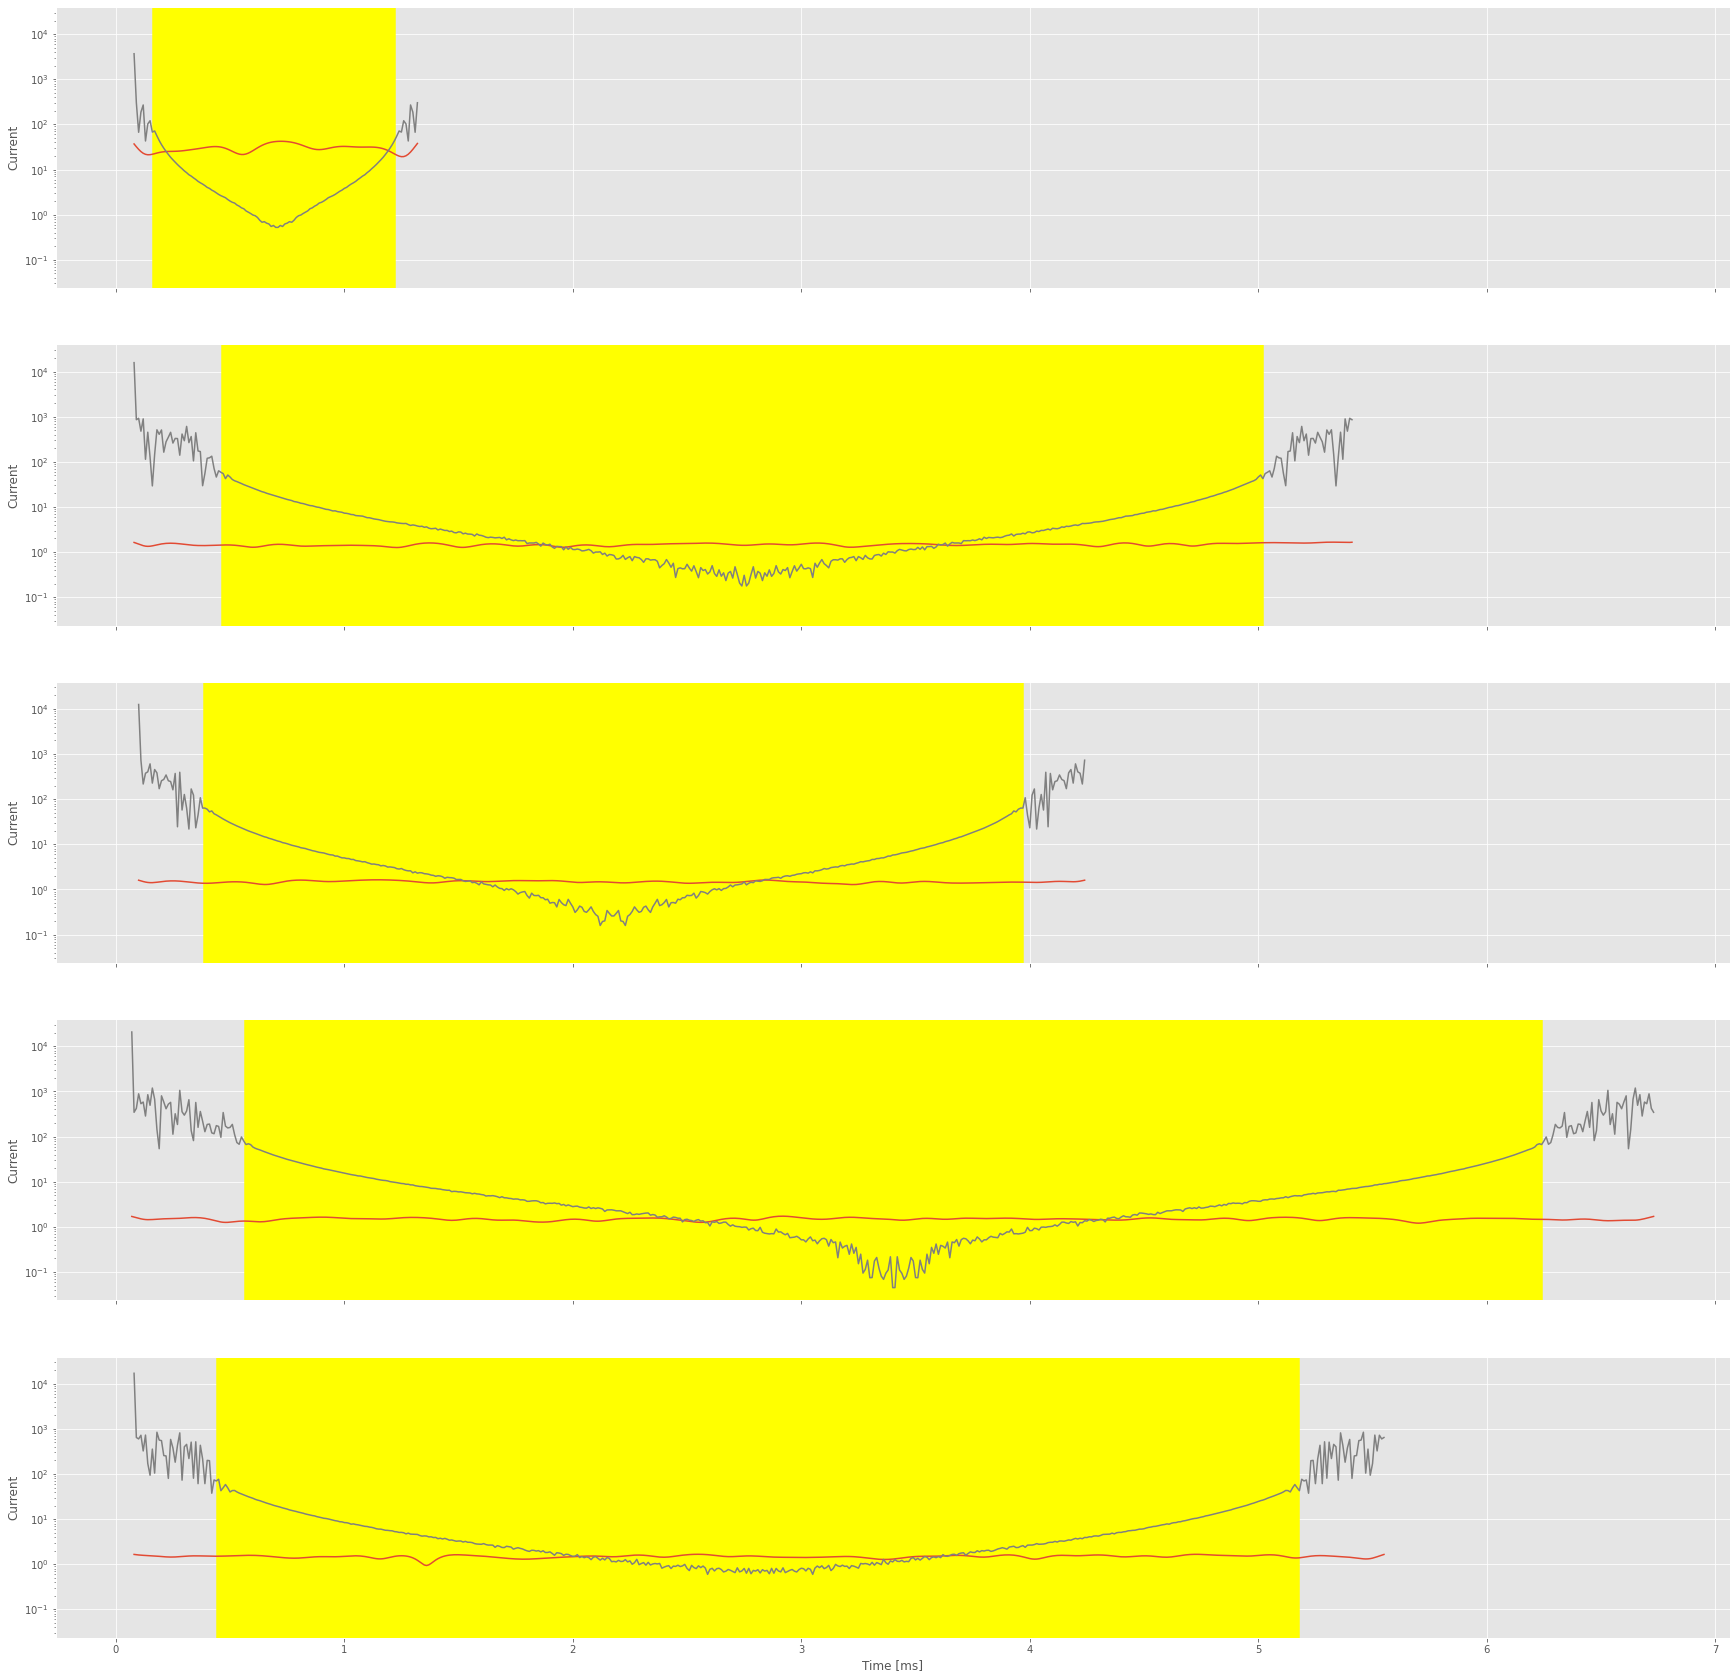

In [8]:
plot_data(aa65_data[:5], plot_fft=True)

In [4]:
aa62_event_lens = np.array([len(event) for event in aa62_data])
aa64_event_lens = np.array([len(event) for event in aa64_data])
aa65_event_lens = np.array([len(event) for event in aa65_data])

In [5]:
from scipy.signal import find_peaks_cwt
peaks = find_peaks_cwt(aa62_data[0][:, 1], widths=10)

In [8]:
peaks, aa62_data[0][peaks]

(array([ 10,  63, 106, 152, 180, 213, 280, 318, 389, 417]),
 array([[ 0.18    , 43.792324],
        [ 0.71    , 36.331707],
        [ 1.14    , 44.35312 ],
        [ 1.6     , 43.36171 ],
        [ 1.88    , 44.84382 ],
        [ 2.21    , 49.430347],
        [ 2.88    , 43.592037],
        [ 3.26    , 55.519012],
        [ 3.97    , 50.7322  ],
        [ 4.25    , 40.637833]], dtype=float32))

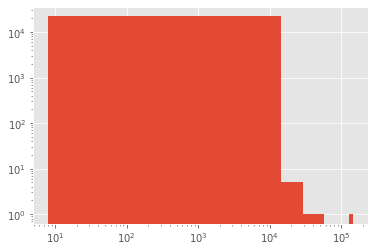

In [15]:
plt.hist(aa62_event_lens)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
np.quantile(aa62_event_lens, 0.9)

1156.2000000000007

In [43]:
aa62_extrema_data = [find_extrema(event, extrema_th=10) for event in aa62_data]
aa64_extrema_data = [find_extrema(event, extrema_th=10) for event in aa64_data]
aa65_extrema_data = [find_extrema(event, extrema_th=10) for event in aa65_data]

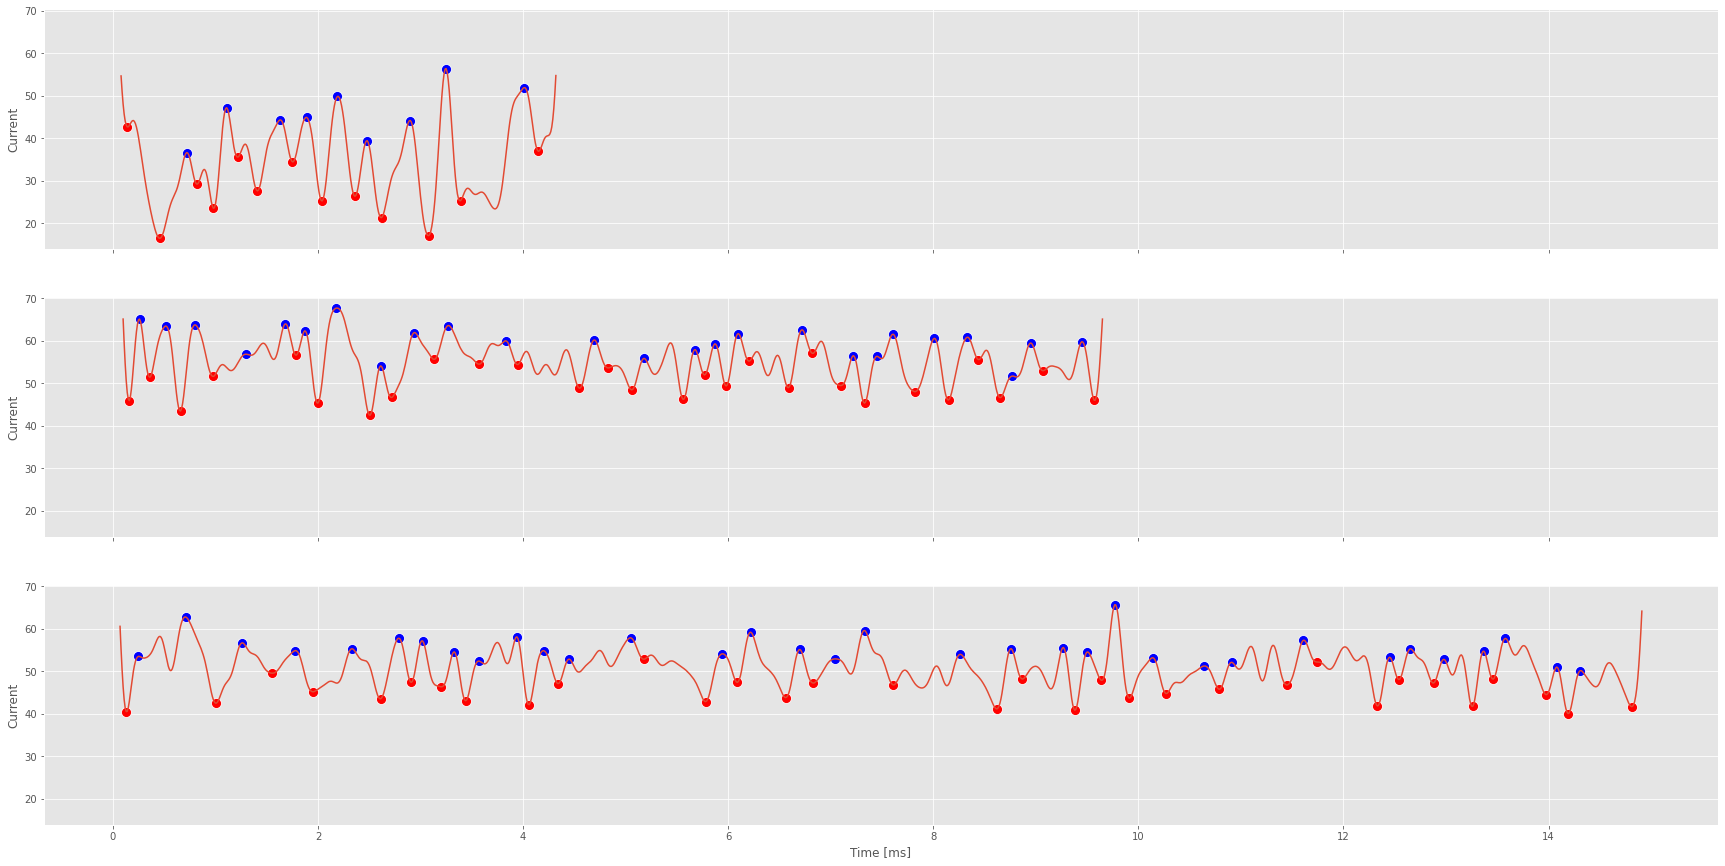

In [26]:
plot_data(aa62_data[:3], plot_extrema=True, extrema_th=5)

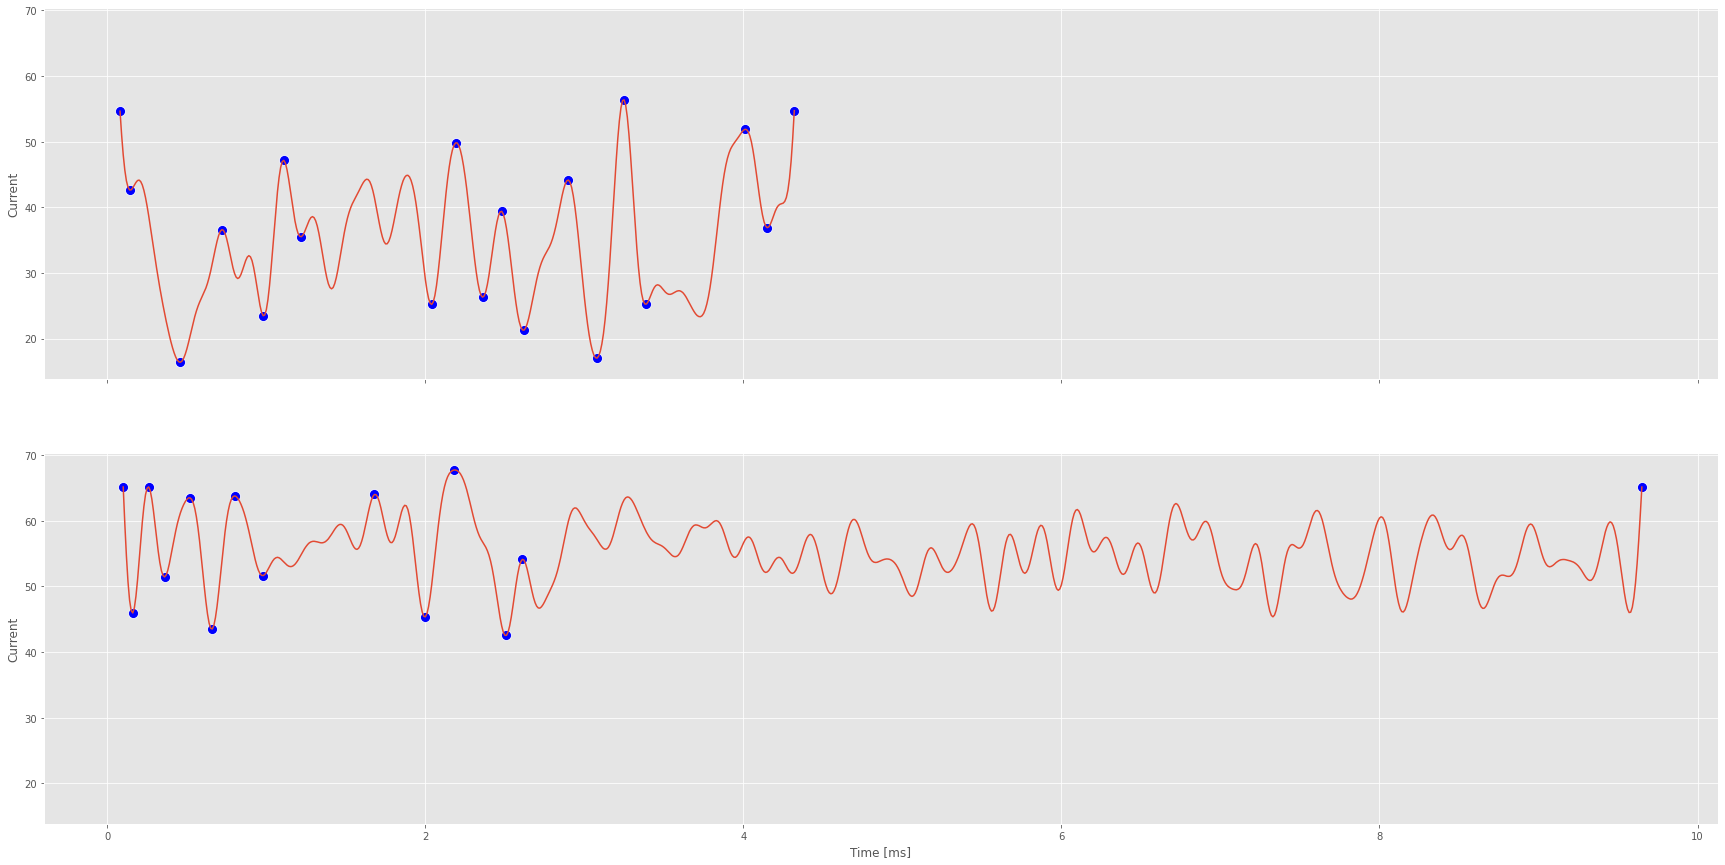

In [6]:
plot_data(aa62_data[:2], plot_extrema=True, extrema_th=10)

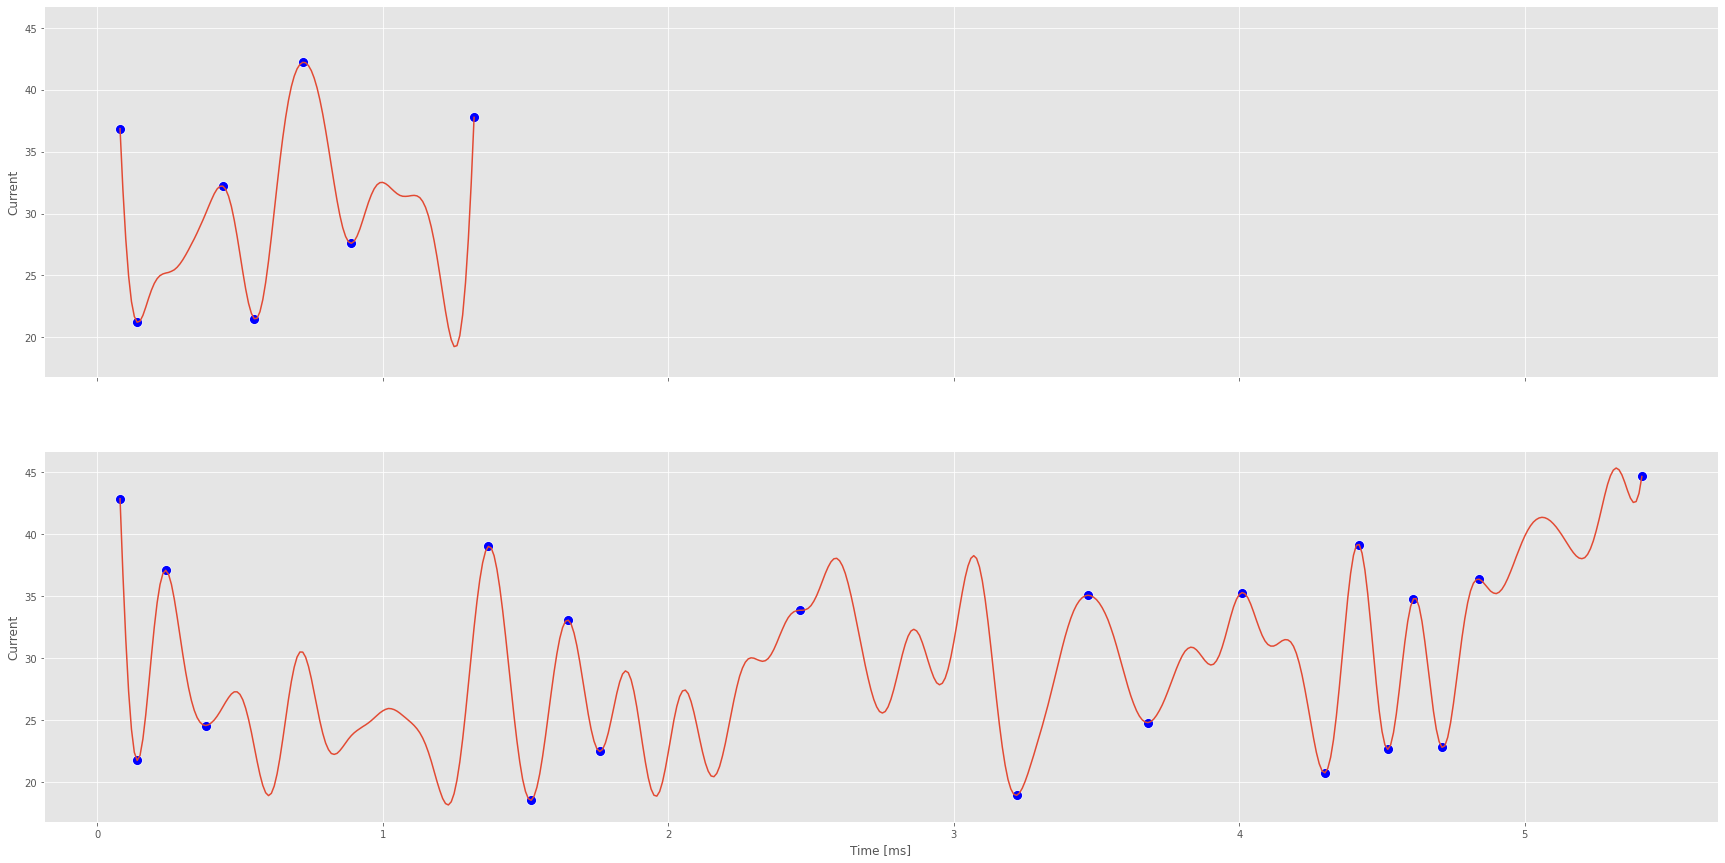

In [7]:
plot_data(aa65_data[:2], plot_extrema=True, extrema_th=10)

In [44]:
aa62_event_lens = [len(event) for event in aa62_extrema_data]
aa64_event_lens = [len(event) for event in aa64_extrema_data]
aa65_event_lens = [len(event) for event in aa65_extrema_data]

In [46]:
aa62_current_diffs = np.hstack([find_current_diffs(event) for event in aa62_extrema_data])
aa64_current_diffs = np.hstack([find_current_diffs(event) for event in aa64_extrema_data])
aa65_current_diffs = np.hstack([find_current_diffs(event) for event in aa65_extrema_data])

In [47]:
aa62_current_diffs

array([-11.987057  , -26.23734   ,  20.178717  , ...,  16.920952  ,
        -0.57232475,   0.5640316 ], dtype=float32)

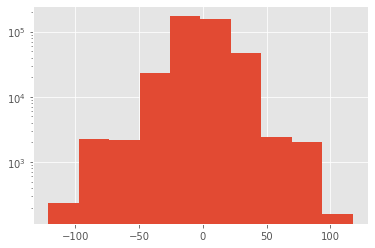

In [50]:
plt.hist(aa62_current_diffs)
plt.yscale('log')
plt.show()

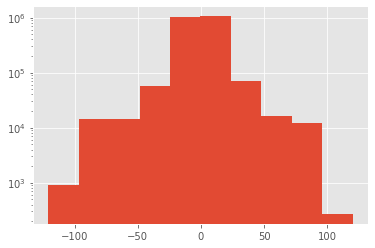

In [51]:
plt.hist(aa64_current_diffs)
plt.yscale('log')
plt.show()

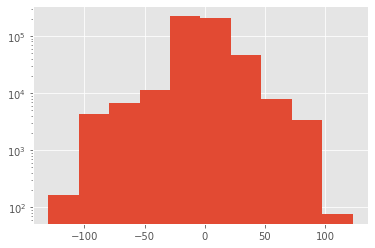

In [52]:
plt.hist(aa65_current_diffs)
plt.yscale('log')
plt.show()

In [ ]:
plt.hist()

In [45]:
max(aa62_event_lens), max(aa64_event_lens), max(aa65_event_lens)

(1232, 2787, 456)

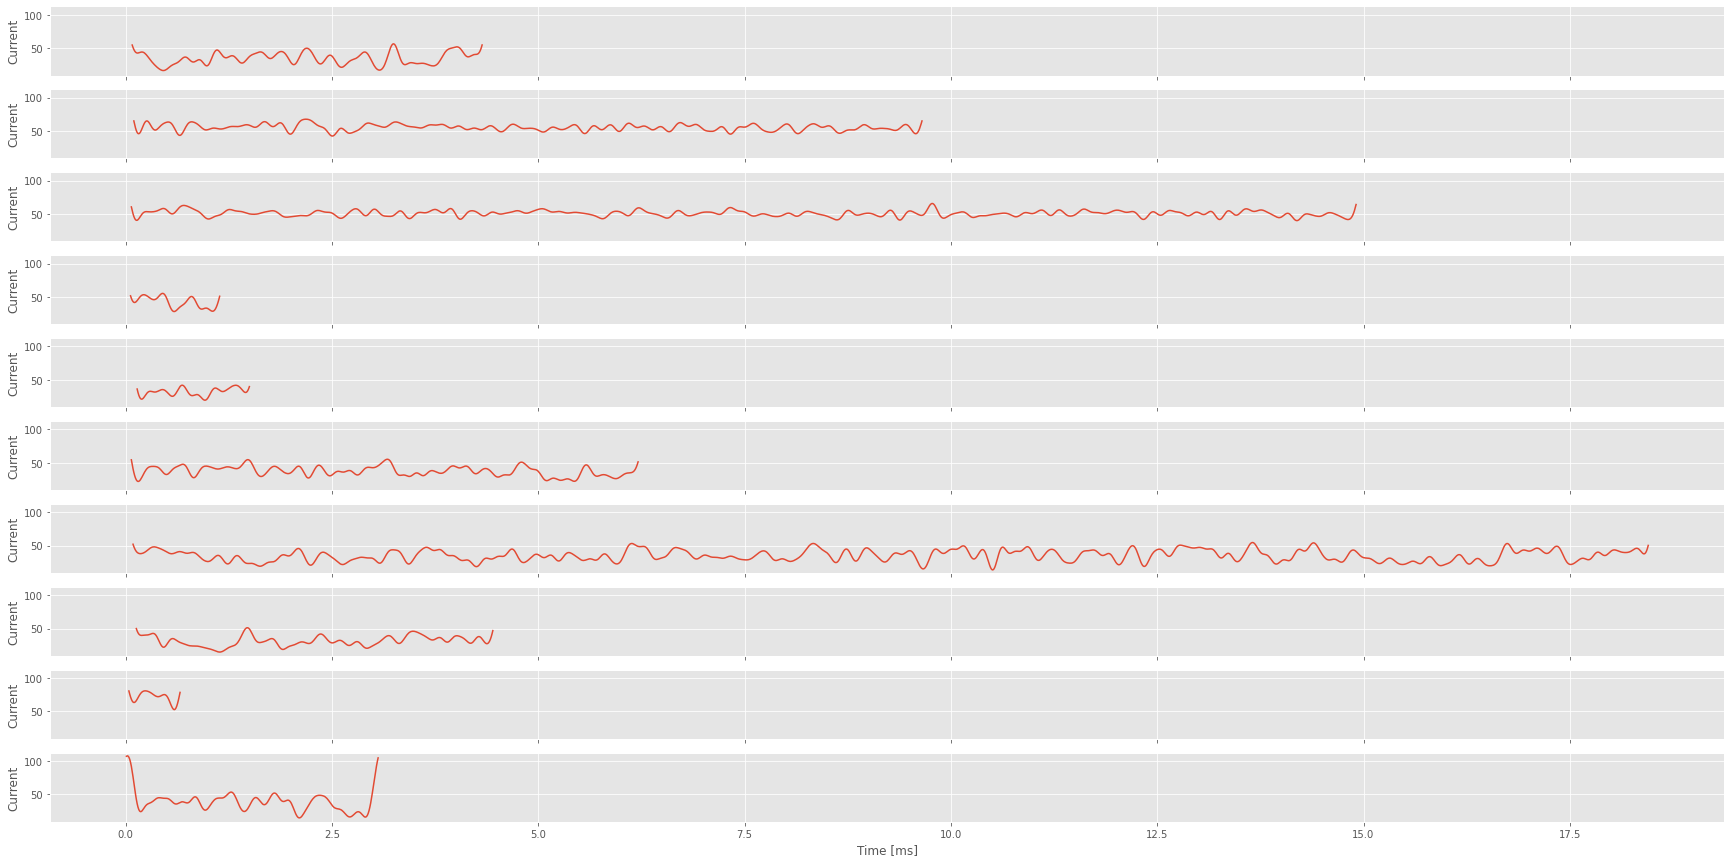

In [45]:
plot_data(aa62_data[:10])

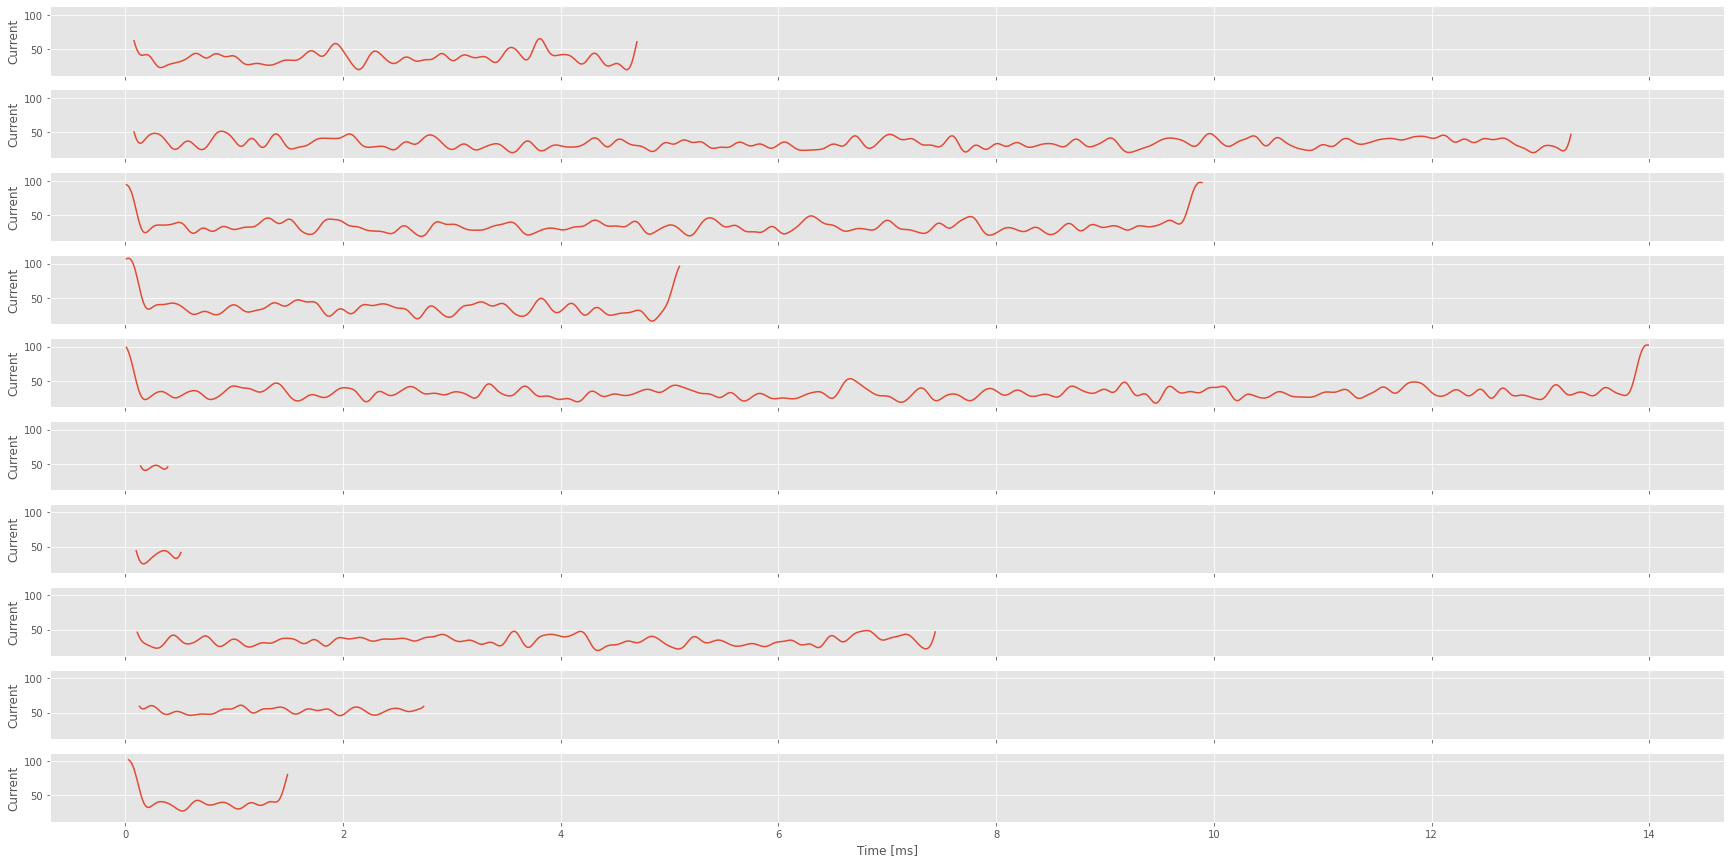

In [46]:
plot_data(aa64_data[:10])

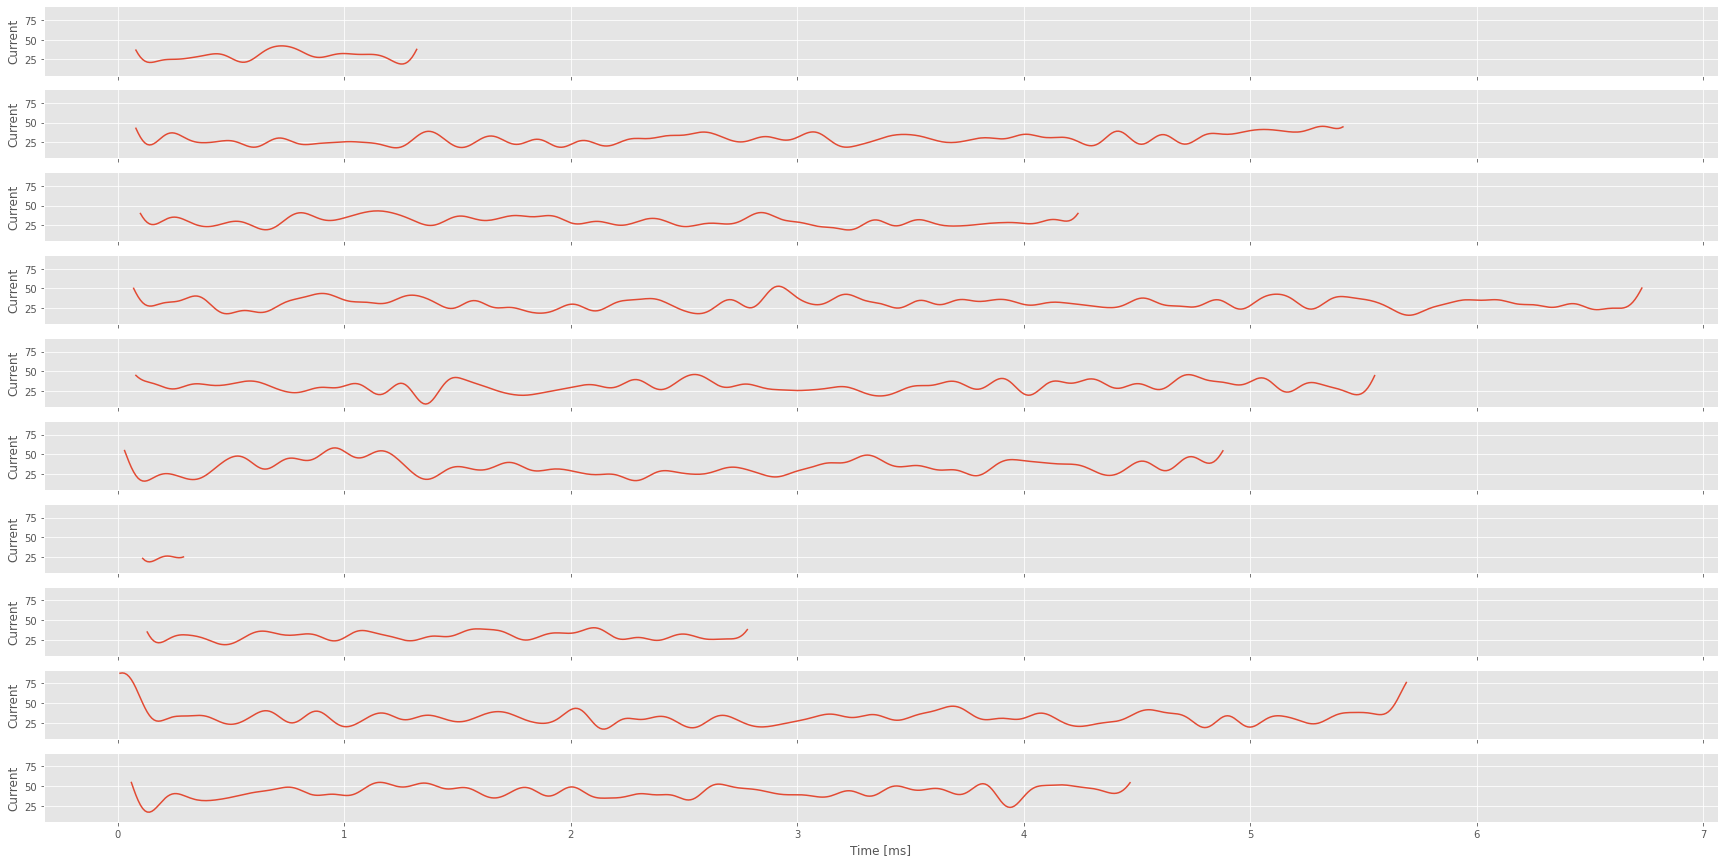

In [47]:
plot_data(aa65_data[:10])

In [9]:
aa62_event_lens = [len(event) for event in aa62_data]
aa64_event_lens = [len(event) for event in aa64_data]
aa65_event_lens = [len(event) for event in aa65_data]

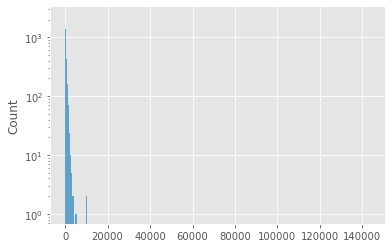

In [49]:
sns.histplot(aa62_event_lens)
plt.yscale('log')

In [50]:
(np.array(aa62_event_lens) > 5000).sum()

45

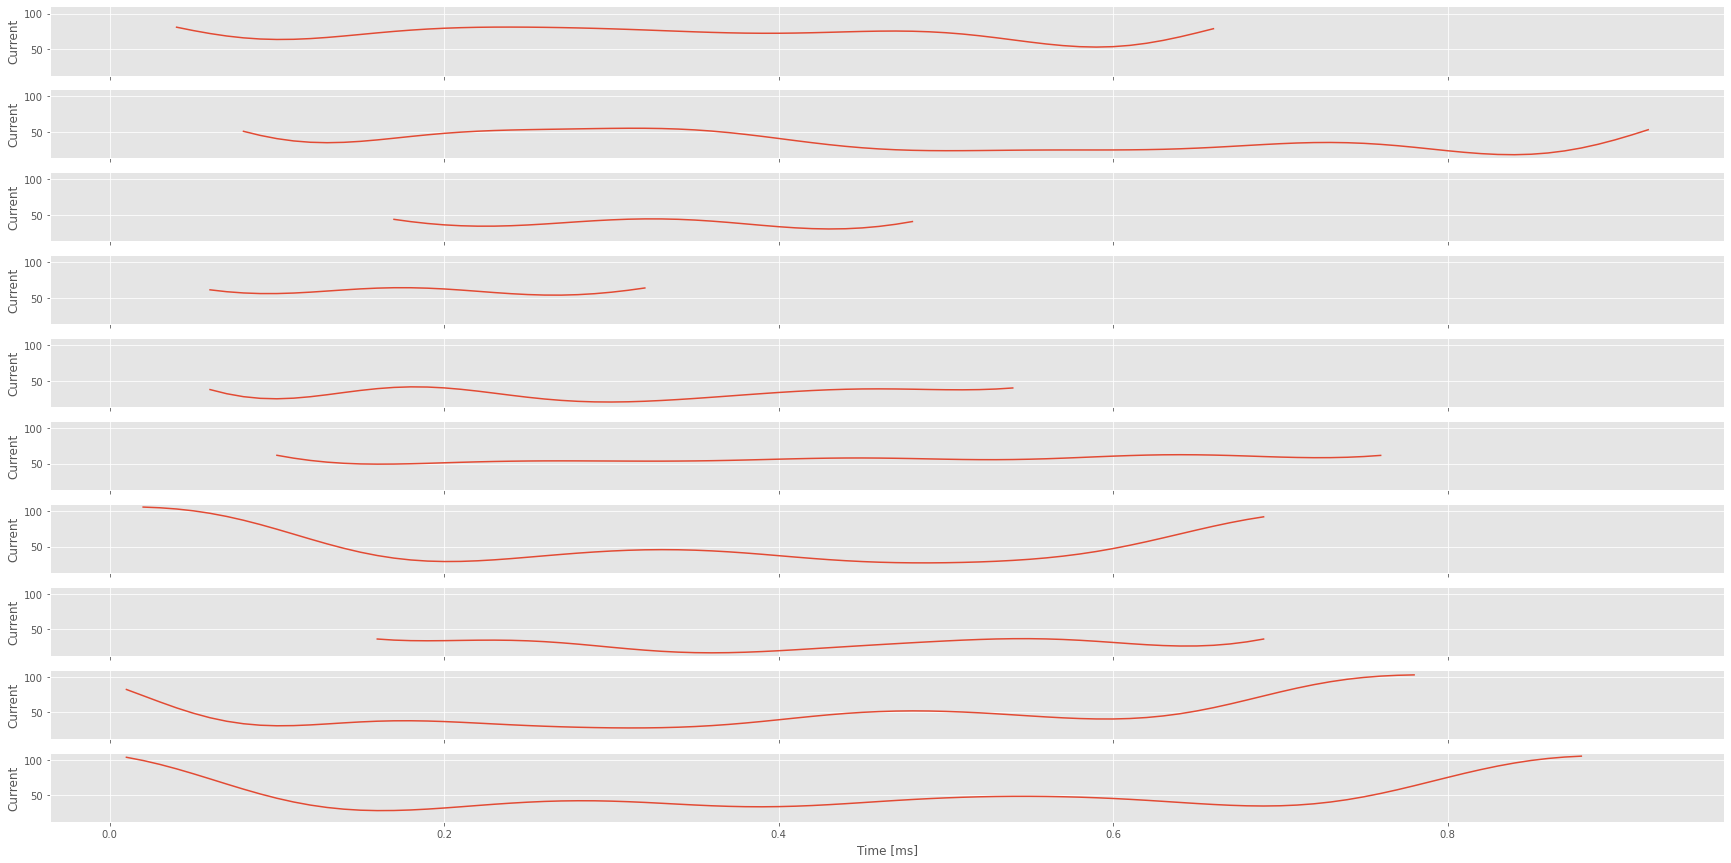

In [7]:
plot_data([event for event in aa62_data if len(event) < 100][:10])

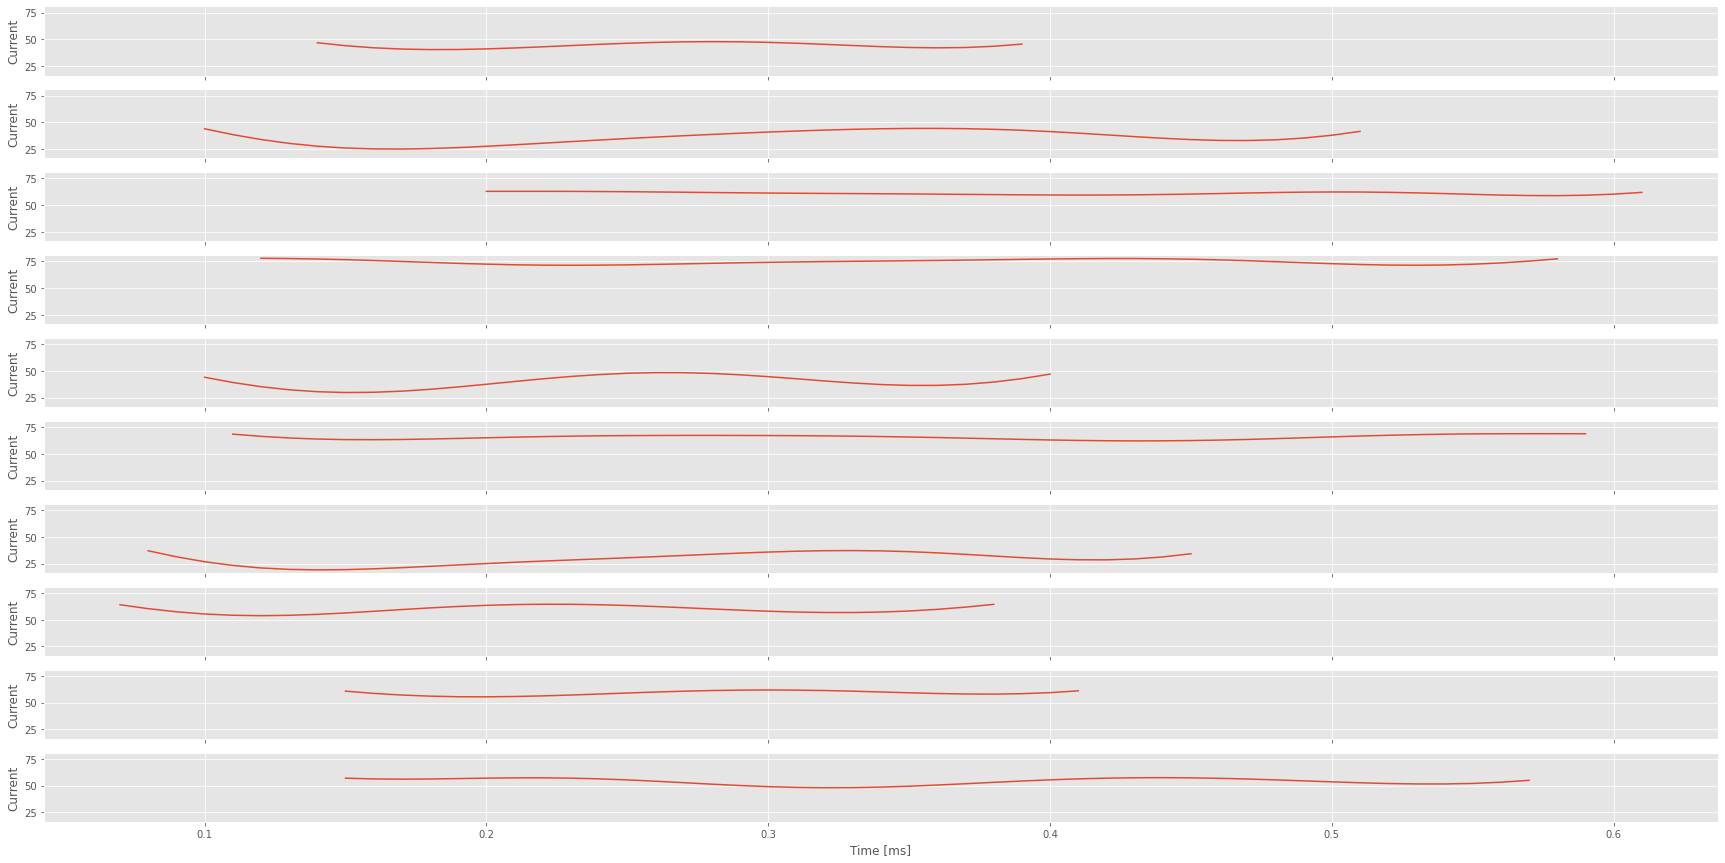

In [6]:
plot_data([event for event in aa64_data if len(event) < 50][:10])

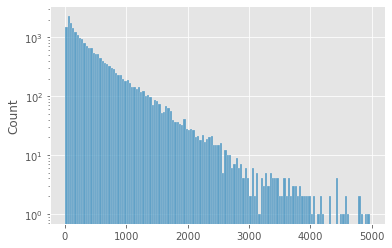

In [51]:
sns.histplot([event_len for event_len in aa62_event_lens if event_len <= 5000])
plt.yscale('log')

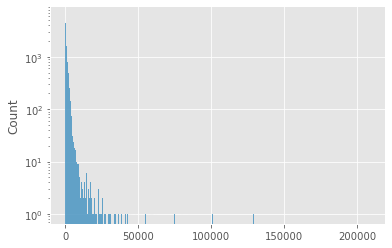

In [52]:
sns.histplot(aa64_event_lens)
plt.yscale('log')

In [53]:
(np.array(aa64_event_lens) > 50000).sum()

23

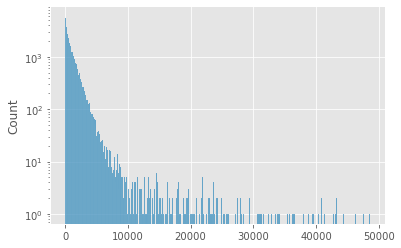

In [54]:
sns.histplot([event_len for event_len in aa64_event_lens if event_len <= 50000])
plt.yscale('log')

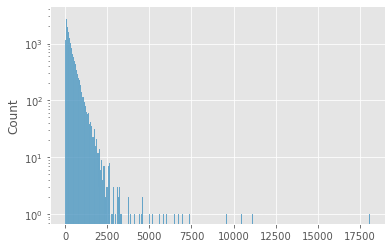

In [55]:
sns.histplot(aa65_event_lens)
plt.yscale('log')

In [56]:
(np.array(aa65_event_lens) > 5000).sum()

26

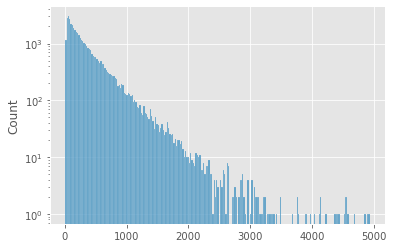

In [57]:
sns.histplot([event_len for event_len in aa65_event_lens if event_len <= 5000])
plt.yscale('log')

In [58]:
aa62_event_durations = [event[-1][0] for event in aa62_data]
aa64_event_durations = [event[-1][0] for event in aa64_data]
aa65_event_durations = [event[-1][0] for event in aa65_data]

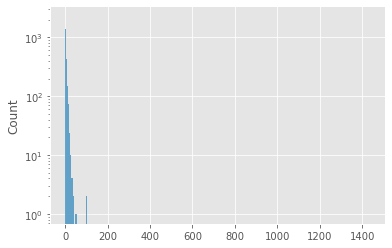

In [59]:
sns.histplot(aa62_event_durations)
plt.yscale('log')

In [60]:
(np.array(aa62_event_durations) > 200).sum()

5

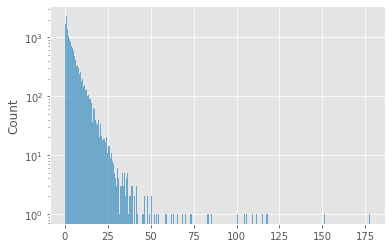

In [61]:
sns.histplot([event_d for event_d in aa62_event_durations if event_d <= 200])
plt.yscale('log')

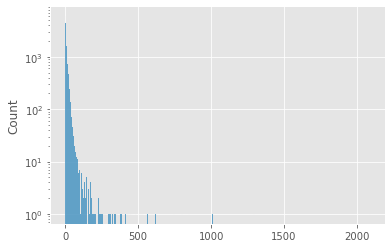

In [62]:
sns.histplot(aa64_event_durations)
plt.yscale('log')

In [63]:
(np.array(aa64_event_durations) > 500).sum()

23

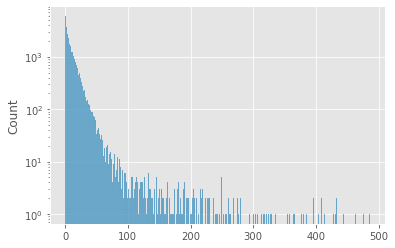

In [64]:
sns.histplot([event_d for event_d in aa64_event_durations if event_d <= 500])
plt.yscale('log')

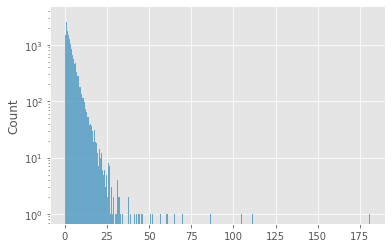

In [65]:
sns.histplot(aa65_event_durations)
plt.yscale('log')

In [66]:
(np.array(aa65_event_durations) > 100).sum()

7

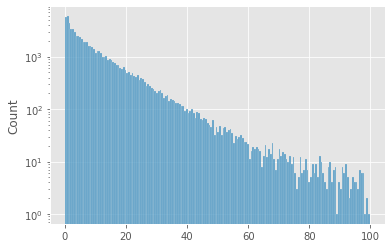

In [67]:
sns.histplot([event_d for event_d in aa64_event_durations if event_d <= 100])
plt.yscale('log')

In [11]:
current_diffs = [event[i, 1]-event[i-1, 1] for event in aa62_data for i in range(1, len(event))]

In [12]:
current_diffs

[-3.6351738,
 -3.0042725,
 -2.323307,
 -1.6323242,
 -0.96136856,
 -0.43061066,
 0.01001358,
 0.30042648,
 0.42059708,
 0.4105873,
 0.2904129,
 0.07009888,
 -0.2303276,
 -0.5107269,
 -0.821167,
 -1.0815392,
 -1.3018532,
 -1.4620819,
 -1.5722389,
 -1.6323204,
 -1.6423378,
 -1.612297,
 -1.5722351,
 -1.5021381,
 -1.4420528,
 -1.351923,
 -1.3018532,
 -1.2417679,
 -1.1816807,
 -1.1316109,
 -1.0514965,
 -0.9914112,
 -0.8912678,
 -0.7811127,
 -0.6409111,
 -0.4706707,
 -0.27038383,
 -0.050071716,
 0.18025589,
 0.4105854,
 0.62088394,
 0.79112434,
 0.9313259,
 1.0214539,
 1.0414829,
 1.0114384,
 0.9413395,
 0.8311825,
 0.7210274,
 0.62088394,
 0.5407696,
 0.5107269,
 0.5307541,
 0.6008549,
 0.7210274,
 0.8712387,
 0.9813976,
 1.1215954,
 1.1816826,
 1.1616516,
 1.0715256,
 0.8812561,
 0.62088394,
 0.26036835,
 -0.09012604,
 -0.45064163,
 -0.7811127,
 -1.0314674,
 -1.1516418,
 -1.2017078,
 -1.0815392,
 -0.86122704,
 -0.5708122,
 -0.21029854,
 0.14019966,
 0.45064163,
 0.67095375,
 0.75107,
 0.711

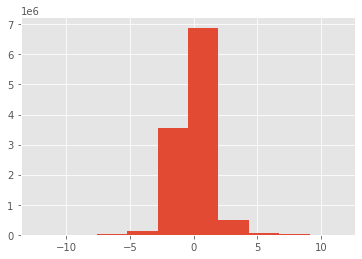

In [13]:
plt.hist(current_diffs)
plt.show()

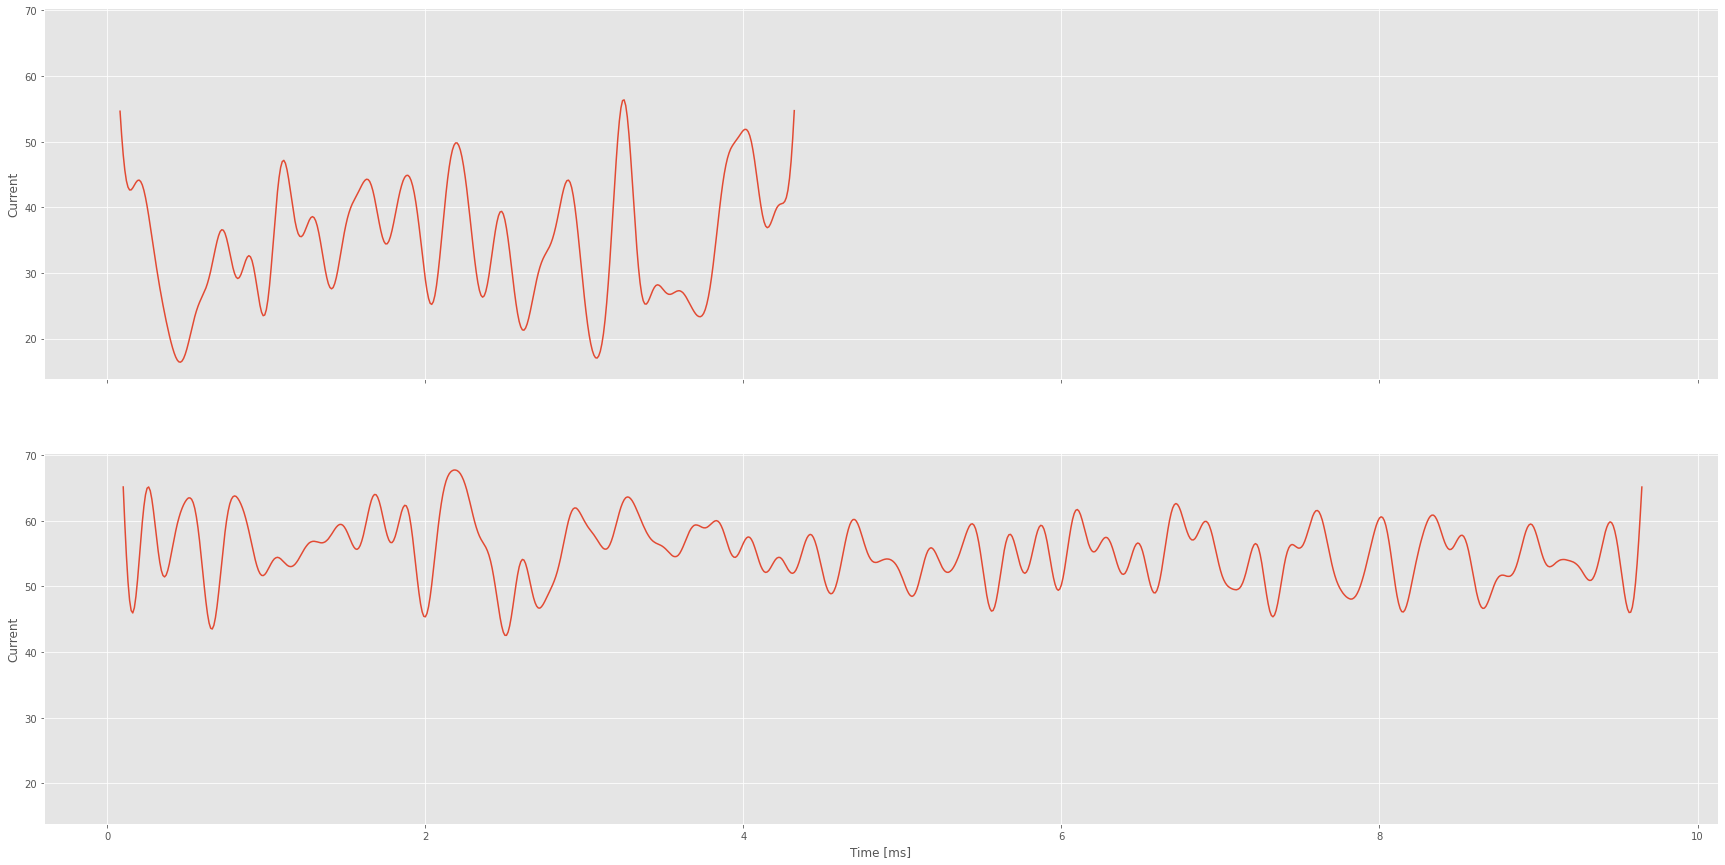

In [17]:
plot_data(aa62_data[:2])